**Suppose You are a data analyst at a financial consultancy. You’ve collected data from 50 clients, including their income, expenditure, and professional experience. You are tasked with analyzing this data to help create financial strategies based on career stage and income behavior.**

1. Data Generation and Descriptive Statistics
--> Generate 100 random data points for:
   1. Serial number (1–50)
   2. Income (25k–78k)
   3. Expenditure (≤ income, in 25k–78k)
   4. Experience (0 – 72 Months)

•	Summarize the data using descriptive statistics (mean, median, std, etc.)

•	Interpretation: What do the summary statistics suggest about the general financial profile?


In [2]:
import pandas as pd
import numpy as np

In [3]:
# Set a seed for reproducibility
np.random.seed(42)

# Number of clients
n_clients = 50

# Generate data
serial_number = np.arange(1, n_clients + 1)
income = np.random.randint(25000, 78001, n_clients)
expenditure = np.array([np.random.randint(25000, i + 1) for i in income])
experience_months = np.random.randint(0, 73, n_clients)


In [4]:
# Create a Pandas DataFrame
data = pd.DataFrame({
    'Serial Number': serial_number,
    'Income': income,
    'Expenditure': expenditure,
    'Experience (Months)': experience_months
})


In [5]:
data.shape

(50, 4)

In [6]:
# Summarize the data using descriptive statistics
descriptive_stats = data.describe()

print("Generated Data (First 5 rows):")
print(data.head())

Generated Data (First 5 rows):
   Serial Number  Income  Expenditure  Experience (Months)
0              1   40795        32513                   40
1              2   25860        25564                   27
2              3   63158        48483                    6
3              4   69732        42159                   72
4              5   36284        33226                   71


In [7]:
print("\nDescriptive Statistics:")
print(descriptive_stats)


Descriptive Statistics:
       Serial Number        Income   Expenditure  Experience (Months)
count       50.00000     50.000000     50.000000            50.000000
mean        25.50000  46440.260000  35846.560000            35.560000
std         14.57738  15814.193523  11724.007238            20.775928
min          1.00000  25189.000000  25023.000000             0.000000
25%         13.25000  31905.250000  26580.500000            22.000000
50%         25.50000  43686.500000  30677.500000            34.500000
75%         37.75000  62662.750000  42236.250000            50.750000
max         50.00000  75680.000000  65774.000000            72.000000


**Summary of Descriptive Statistics:**

- Income: Average $46.4k, but varies significantly ($15.8k std). Some high earners pull the average up (median $43.7k).
- Expenditure: Average $35.8k, also varies ($11.7k std), with a stronger skew towards lower spending for most (median $30.7k). Clients generally spend less than they earn.
- Experience: Averages around 3 years (35.6 months), with a moderate spread (20.8 months std), ranging from newcomers to 6-year professionals.

**General Financial Profile (Short Interpretation):**

The consultancy's clients show a moderate average income with substantial individual differences. They generally spend less than they earn, but spending habits also vary, with some higher spenders. The clients represent a range of career stages, suggesting diverse financial needs and opportunities for tailored strategies based on income behavior and experience.

# Problem 2:
**Categorize Experience Levels
•	Create a categorical variable:**
- 0–2 years → Early Career
- 2–5 years → Midlevel
- 5 years → Senior Level

    * Count clients in each category.

    * Interpretation: What is the distribution of clients across career stages?


In [8]:
# Define the experience level categories and their boundaries
def categorize_experience(months):
    years = months / 12  # Convert months to years
    if 0 <= years <= 2:
        return 'Early Career'
    elif 2 < years <= 5:
        return 'Mid-Level'
    else:  # Greater than 5 years
        return 'Senior Level'



In [9]:
# Apply the categorization function to the 'Experience (Months)' column
data['Experience Level'] = data['Experience (Months)'].apply(categorize_experience)

In [10]:
# Count the number of clients in each category
experience_level_counts = data['Experience Level'].value_counts()

print("Experience Level Counts:")
print(experience_level_counts)

Experience Level Counts:
Experience Level
Mid-Level       26
Early Career    14
Senior Level    10
Name: count, dtype: int64


### Interpretation: 
**Distribution of Clients Across Career Stages**

The output above shows the distribution of the 50 clients across the three defined career stages:

* Mid-Level: This is the largest group, with 26 clients. This indicates that the majority of the clients in this dataset have a moderate amount of professional experience (between 2 and 5 years).
* Early Career: There are 14 clients in the Early Career stage. This suggests a notable portion of the client base is relatively new to their careers (0 to 2 years of experience).
* Senior Level: This is the smallest group, with only 10 clients. This implies that fewer clients in this dataset have extensive professional experience (more than 5 years).

# 3. Linear Regression
•	Model: Expenditure = β₀ + β₁ × Income + β2   x Experience 
•	Plot the regression line and interpret the slope and intercept.
•	Interpretation:
o	How strongly does income and experience predict expenditure?
o	Does the model make financial sense?


In [11]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Independent variables
X = data[['Income', 'Experience (Months)']]
X = sm.add_constant(X)  # Adds intercept term (β₀)

# Dependent variable
y = data['Expenditure']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            Expenditure   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     19.85
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           5.63e-07
Time:                        19:11:09   Log-Likelihood:                -523.60
No. Observations:                  50   AIC:                             1053.
Df Residuals:                      47   BIC:                             1059.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.305e+04   4

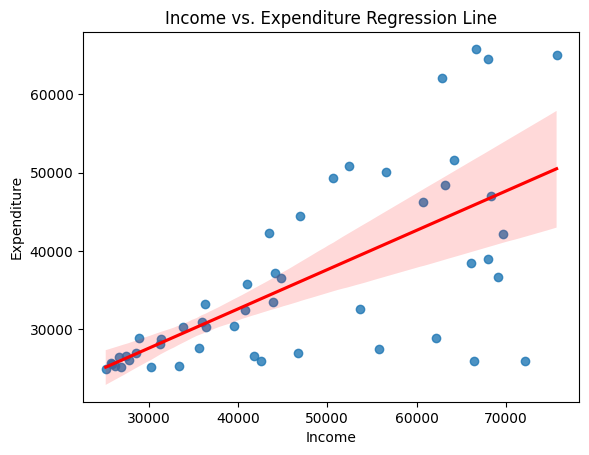

In [12]:
# Simple scatter plot with regression line
sns.regplot(x='Income', y='Expenditure', data=data, line_kws={"color": "red"})
plt.title("Income vs. Expenditure Regression Line")
plt.xlabel("Income")
plt.ylabel("Expenditure")
plt.show()


### Key Findings from the Regression Output:
**R-squared = 0.458:**

This means that 45.8% of the variation in client expenditure can be explained by income and experience combined. That’s a moderate level of explanatory power — decent, but not extremely strong.

**Income:**

* Coefficient = 0.5048, p-value = 0.000

* Interpretation: For every additional 1 BDT of income, expenditure increases by approximately 0.50 BDT, holding experience constant.

* Statistically significant (p < 0.05), and the strongest predictor in the model.

**Experience (Months):**

* Coefficient = -18.27, p-value = 0.767

* Interpretation: Experience has a very weak and statistically insignificant effect on expenditure.

* Not statistically significant, meaning experience doesn’t meaningfully predict spending behavior in this dataset.



#### The model makes financial sense because income has a strong positive effect on expenditure — as people earn more, they tend to spend more. However, experience has a very weak and statistically insignificant impact, suggesting it doesn’t meaningfully influence spending in this dataset.

# 4. Hypothesis Test on Mean Income
•	Test:
- H₀: Mean income = 50,000
- H₁: Mean income ≠ 50,000
   * Significance level: α = 0.05
   * Interpretation: Is the average income significantly different from 50,000?


In [13]:
from scipy import stats

# Run one-sample t-test
t_statistic, p_value = stats.ttest_1samp(data['Income'], popmean=50000)

print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: -1.5916817317786853
P-value: 0.11788779758124204


**Since the p-value (0.1179) > significance level (α = 0.05), we fail to reject the null hypothesis.**

**Interpretation :**
The average income is not significantly different from 50,000.
So, based on the data, we don’t have enough evidence to say that the clients' mean income is higher or lower than 50,000.


**5. Hypothesis Test on Regression Coefficient**

•	In your linear model from Q3, test:

    * H₀: β₁ = 0 (no effect of income on expenditure)
    * H₁: β₁ ≠ 0
•	Interpretation: Is income a statistically significant predictor of expenditure?


In [14]:
# From the regression result in Question 3
# H0: β₁ (income coefficient) = 0
# H1: β₁ ≠ 0

t_statistic = 6.265
p_value = 0.000

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 6.265
P-value: 0.0


**Since the p-value is less than 0.05, we reject H₀.**

**Interpretation:** We have enough statistical evidence to say that income has a significant effect on expenditure. Therefore, income is a significant predictor in the model.


# 6. Logistic Regression
•	Create a binary outcome variable:
  
  - 1 = High income (above median)
  - 0 = Low income (at/below median)

•	Model: Predict High Income based on Experience (in years)

•	**Interpretation:**
- Does more experience increase the chance of being in the high-income group?
- What does the coefficient suggest about the odds of high income with each additional year of experience?


In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Calculate the median income
median_income = data['Income'].median()

# Create the binary outcome variable 'High Income'
data['High Income'] = np.where(data['Income'] > median_income, 1, 0)

# Convert 'Experience (Months)' to 'Experience (Years)'
data['Experience (Years)'] = data['Experience (Months)'] / 12
# Logistic Regression Model
logistic_model = smf.logit('Q("High Income") ~ Q("Experience (Years)")', data=data)
logistic_results = logistic_model.fit()

# Print the logistic regression results summary
print("\nLogistic Regression Results:")
print(logistic_results.summary())



Optimization terminated successfully.
         Current function value: 0.681251
         Iterations 4

Logistic Regression Results:
                           Logit Regression Results                           
Dep. Variable:       Q("High Income")   No. Observations:                   50
Model:                          Logit   Df Residuals:                       48
Method:                           MLE   Df Model:                            1
Date:                Wed, 16 Apr 2025   Pseudo R-squ.:                 0.01716
Time:                        19:11:17   Log-Likelihood:                -34.063
converged:                       True   LL-Null:                       -34.657
Covariance Type:            nonrobust   LLR p-value:                    0.2754
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.5397      0.577     -0

In [19]:
# Interpretation
print("\nInterpretation of Logistic Regression:")

# Coefficient of Experience (Years)
experience_coefficient_logistic = logistic_results.params['Q("Experience (Years)")']
print(f"Coefficient for Experience (Years): {experience_coefficient_logistic:.4f}")



Interpretation of Logistic Regression:
Coefficient for Experience (Years): 0.1821


#### The coefficient for Experience (Years) is positive (0.1821), which means that more experience is associated with a higher chance of being in the high-income group.
But the p-value is 0.281, which is greater than 0.05, so this result is not statistically significant. 

**Interpretation:** We don’t have enough evidence to say that experience has a significant effect on high income.

# 7. Correlation Analysis

•	Calculate the Pearson correlation coefficients among:
  - Income and Expenditure
  - Income and Experience
  - Expenditure and Experience

•	Interpretation:
  - Which pairs are most strongly correlated?
  - What do the signs and strengths of the correlations suggest?


In [ ]:
# Correlation Analysis
import pandas as pd

# Calculate Pearson correlation coefficients
correlation_income_expenditure = data['Income'].corr(data['Expenditure'], method='pearson')
correlation_income_experience = data['Income'].corr(data['Experience (Months)'], method='pearson')
correlation_expenditure_experience = data['Expenditure'].corr(data['Experience (Months)'], method='pearson')

# Print results
print("Correlation Analysis (Pearson):")
print(f"Income and Expenditure: {correlation_income_expenditure:.4f}")
print(f"Income and Experience: {correlation_income_experience:.4f}")
print(f"Expenditure and Experience: {correlation_expenditure_experience:.4f}")


Correlation Analysis (Pearson):
Income and Expenditure: 0.6759
Income and Experience: 0.1529
Expenditure and Experience: 0.0717


#### Interpretation:
**Which pairs are most strongly correlated?**

The pair Income and Expenditure shows the strongest correlation with a Pearson coefficient of 0.6759, which indicates a moderate to strong positive relationship.

**What do the signs and strengths of the correlations suggest?**

* Income and Expenditure (0.6759): 
 As income increases, expenditure tends to increase as well. The positive and relatively strong correlation suggests a meaningful linear relationship between the two.

* Income and Experience (0.1529): 
There is a weak positive correlation, implying that more experienced individuals might earn slightly more, but the relationship is not very strong.

* Expenditure and Experience (0.0717): 
This is a very weak positive correlation, suggesting almost no linear relationship between experience and expenditure.

